# Diabetes 130-US hospitals for years 1999-2008 Data Set

**Abstract:** This case has been prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes.

**Each phase of the process:**
1. [Business understanding](#Businessunderstanding)
    1. [Assess the Current Situation](#Assessthecurrentsituation)
        1. [Inventory of resources](#Inventory)
        2. [Requirements, assumptions and constraints](#Requirements)
        3. [Risks and contingencies](#Risks)
        4. [Terminology](#Terminology)
        5. [Costs and benefits](#CostBenefit)
    2. [What are the Desired Outputs](#Desiredoutputs)
    3. [What Questions Are We Trying to Answer?](#QA)
2. [Data Understanding](#Dataunderstanding)
    1. [Initial Data Connetion](#Datareport)
    2. [Describe Data](#Describedata)
    4. [Verify Data Quality](#Verifydataquality)
        1. [Missing columns](#MissingData) 
        2. [Missing rows](#MissingData) 
        3. [Outliers](#Outliers) 
3. [Data Preparation](#Datapreparation)
    1. [Altering Datatypes](#AlteringDatatypes)
    2. [Saving data modeled data](#DealingZeros)
    3. [Drop Unnecessary Columns](#DropCols)
    4. [Outliers treatment](#DropCols)
    5. [Dealing With NaNs](#DealingZeros)
    6. [Saving data transformed data](#DealingZeros)
4. [Features Engineering](#Datapreparation)
     1. [New Features](#Datapreparation)
     2. [Recodings](#DropCols)
     3. [Dummies creation](#DropCols)
     4. [Target creation](#DealingZeros)
     5. [Clean new features col name](#DealingZeros)
     6. [Saving data feature engineered data](#DealingZeros)
5. [Modelling](#Modelling)
    1. [Build Model](#BuildModel)
    2. [Build tuning](#BuildModel)
    3. [Save Model](#BuildModel)
    4. [Model Insights](#AssessModel)
    5. [PCA Insights](#AssessModel)
    .
6. [Evaluation](#Evaluation)
7. [Deployment](#Deployment)

# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>

## 1.1 Assess the Current Situation<a class="anchor" id="Assessthecurrentsituation"></a>

There are not insights about the diabetes patients hospital readmissions. 

### 1.1.1. Inventory of resources <a class="anchor" id="Inventory"></a>
List the resources available to the project including:
- Personnel: 1 "full stack" DS Coordinator
- Data: Diabetes 130-US hospitals for years 1999-2008 https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#
- Computing resources: Intel i7 8-core @ 2.8Ghz, GPU GTX 1060 6GB GDDR5, Ram 16gb. 
- Software: Linux, Python 3.7, Visual Studio, Notebook Jupyter


### 1.1.2. Requirements, assumptions and constraints - <a class="anchor" id="Requirements"></a> 
Predict three categories of readmission pacients:
* Less than 30: if the patient was readmitted in less than 30 days  
* More than 30: if the patient was readmitted in more than 30 days  
* No record: for no record of readmission  

To the MVP we simplify the target to:  
* 1: if the patient was readmitted in less than 30 and more than 30  
* 0: for no record of readmission  

### 1.1.3.Risks and contingencies <a class="anchor" id="Risks"></a>
- Changes in current pacients behaviours in constrast to given dataset  
I suggest to update the data. As this a very high impact prediction for life quality of the pacients, we should not experiment with pacient in online prediction with the model train with more than 10 years old dataset. The cost of false negative could be very high.

### 1.1.4.Terminology <a class="anchor" id="Terminology"></a>
- No apply by the moment

### 1.1.5.Costs and benefits  <a class="anchor" id="CostBenefit"></a>
- It has been doing by PM team.

 ## 1.2 What are the desired outputs of the project? <a class="anchor" id="Desiredoutputs"></a>


**Business success criteria**
- Reduce cost of diabetes readmissions by 10% during the next 12 month after prediction get online after pacient trial phase. 

**Data mining success criteria**
- AUC-ROC above 50%
- Get the MVP in one day


**Produce project plan**
- https://github.com/wiflore/Diabetes-ML-Case/projects/1


 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

- How could we know which pacient will comeback in the next 30 days due to a potental bad diabetes treatment?

# 2.  Data Understanding <a class="anchor" id="Dataunderstanding"></a>

## 2.1 Initial Data Connetion <a class="anchor" id="Datareport"></a>

In [1]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import gc
from src.utilities import helpers
import os
import pathlib
import re

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time
# Import supplementary visualization code visuals.py
from src.utilities import visuals as vs

# Pretty display for notebooks
%matplotlib inline


In [164]:
BASE_PATH = os.path.dirname(os.path.abspath("")) + os.sep  #change "" to __file__ in .py
VERSION = 2

In [110]:
#Data source: 
#Source Query location: 
path =  BASE_PATH + 'data/raw/diabetic_data.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df =  pd.read_csv(path, sep=',') 

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>

In [111]:
df.shape

(101766, 50)

In [112]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [113]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [114]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>

### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

It is supicious that there are not missing value. 

Checking unique values in object columns

In [116]:
for col in df.select_dtypes(include = ['object']):
    unique = df[col].unique()
    if len(unique) == 1:
        print(f"\t<<<< one value column >>>>")
    print(f">>{col}: len: {len(unique)} list: {unique} \n")

>>race: len: 6 list: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] 

>>gender: len: 3 list: ['Female' 'Male' 'Unknown/Invalid'] 

>>age: len: 10 list: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

>>weight: len: 10 list: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

>>payer_code: len: 18 list: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR'] 

>>medical_specialty: len: 73 list: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-Critic

"?" is the missing code. So, I'm going change it for np.NaN

In [117]:
df.replace('?',np.nan,inplace=True)

Now, it time to see the columns with a lot of missings

0               weight
1    medical_specialty
Name: Feature, dtype: object

<Figure size 432x288 with 0 Axes>

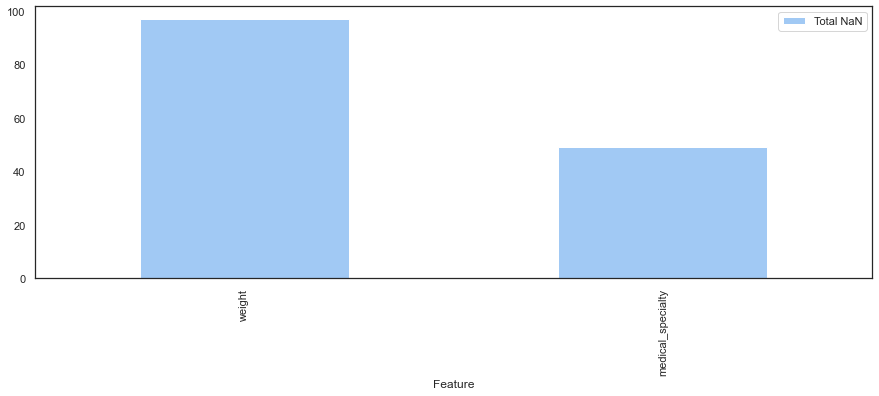

In [118]:
missing_thresold = 40
missings = helpers.missing_data(df, missing_thresold)

Weight and medical_speciality has at least 40% NaNs

### 2.3.2 Missing rows

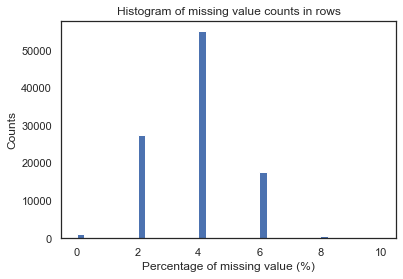

,count,weight,cumsum
"[0, 1)",1043,0.010249,0.010249
"[1, 2)",0,0.000000,0.010249
"[2, 3)",27449,0.269727,0.279976
"[3, 4)",0,0.000000,0.279976
"[4, 5)",55042,0.540868,0.820844
"[5, 6)",0,0.000000,0.820844
"[6, 7)",17640,0.173339,0.994183
"[7, 8)",0,0.000000,0.994183
"[8, 10)",564,0.005542,0.999725
"[10, 15)",28,0.000275,1.000000


In [119]:
missings = (
    df.isnull().sum(axis=1) / len(df.columns) * 100).sort_values(
        ascending=False)
plt.hist(missings[missings >= 0], bins=40)
plt.xlabel('Percentage of missing value (%)')
plt.ylabel('Counts')
plt.title('Histogram of missing value counts in rows')
plt.show()
#
bins = pd.cut(
    missings, [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 30, 50, 80], right=False)
agg = pd.DataFrame(
    missings, columns=['missings']).groupby(bins)['missings'].agg(['count'])
agg['weight'] = agg['count'] / len(missings)
agg['cumsum'] = agg['weight'].cumsum()
agg

Distribution

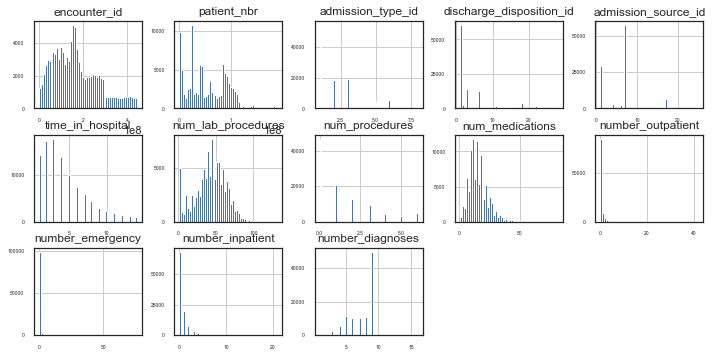

In [120]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(12, 35), bins=50, xlabelsize=5, ylabelsize=5, layout=(17,5)); # ; avoid havi

In [121]:
df_num.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

In [122]:
len(df.encounter_id.unique())/len(df)

1.0



### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>

<AxesSubplot:>

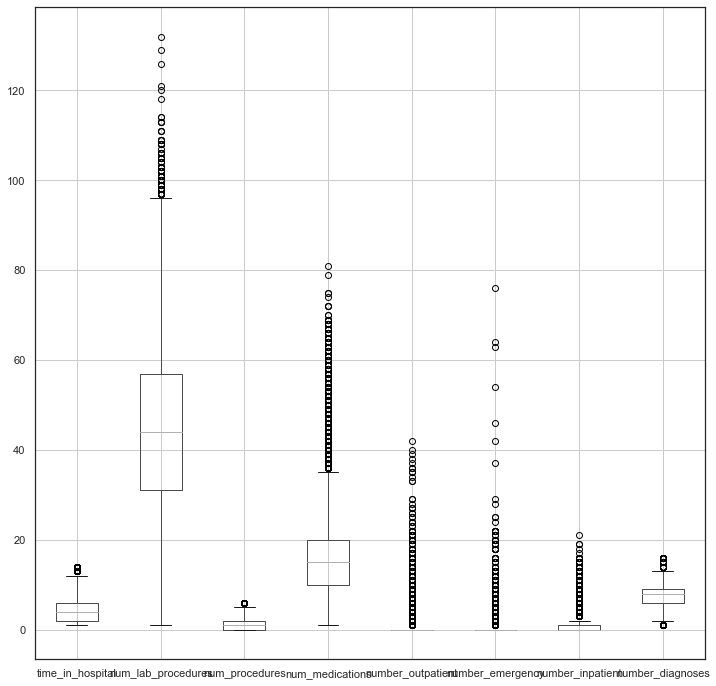

In [123]:
num_cols =['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses']
df.boxplot(column=num_cols, figsize=(12, 12))

In [124]:
# get outliers
def get_outliers(df, columns, left = 1.5, right = 1.5):
    """
    Outliers of columns
    INPUT: df - DataFrame to Process
           col - Col to process
    OUTPUT:
           outliers
    """
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df[columns] < (Q1 - left * IQR)) |
                               (df[columns] > (Q3 + right * IQR)))]
    return outliers[columns]

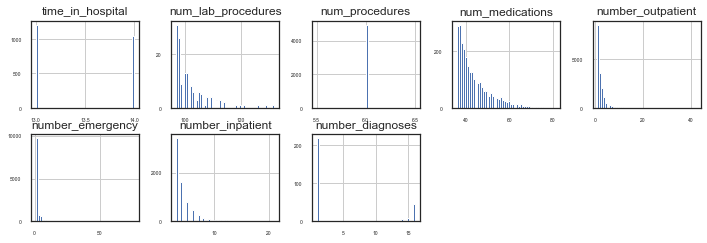

In [125]:
df_out = get_outliers(df, num_cols)
df_out.hist(figsize=(12, 35), bins=50, xlabelsize=5, ylabelsize=5, layout=(17,5)); # ; avoid havi

In [126]:
1-df_out.isnull().sum()/len(df)

time_in_hospital      0.022129
num_lab_procedures    0.001405
num_procedures        0.048680
num_medications       0.025126
number_outpatient     0.164485
number_emergency      0.111855
number_inpatient      0.069267
number_diagnoses      0.002761
dtype: float64

In [127]:
del df_num
del df_out
gc.collect()

188697

# 3. Data Preparation <a class="anchor" id="Datapreperation"></a>

## 3.1 Altering Data Types <a class="anchor" id="AlteringDatatypes"></a>

In [128]:
columns_num_to_obj = ['admission_type_id','discharge_disposition_id', 'admission_source_id' ]
df[columns_num_to_obj] = df[columns_num_to_obj].astype('O')

## 3.2 Saving modeled data

In [129]:
df_dtypes = df.dtypes.to_frame('dtypes')
df_dtypes = df_dtypes.astype(str)
df.to_parquet(BASE_PATH + 'data/modeled/df_modeled.parquet.gzip', compression='gzip') 
df_dtypes.to_parquet(BASE_PATH + 'data/modeled/df_modeled_dtypes.parquet.gzip', compression='gzip') 

## 3.3 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>

#### Reading modeled data

In [130]:
df=pd.read_parquet(BASE_PATH + 'data/modeled/df_modeled.parquet.gzip')
dtypes=pd.read_parquet(BASE_PATH + 'data/modeled/df_modeled_dtypes.parquet.gzip')
df = df.astype(dtypes.to_dict()['dtypes'])

#### Analysing and droping columns with high level of missings

0               weight
1    medical_specialty
Name: Feature, dtype: object

0               weight
1    medical_specialty
Name: Feature, dtype: object

<Figure size 432x288 with 0 Axes>

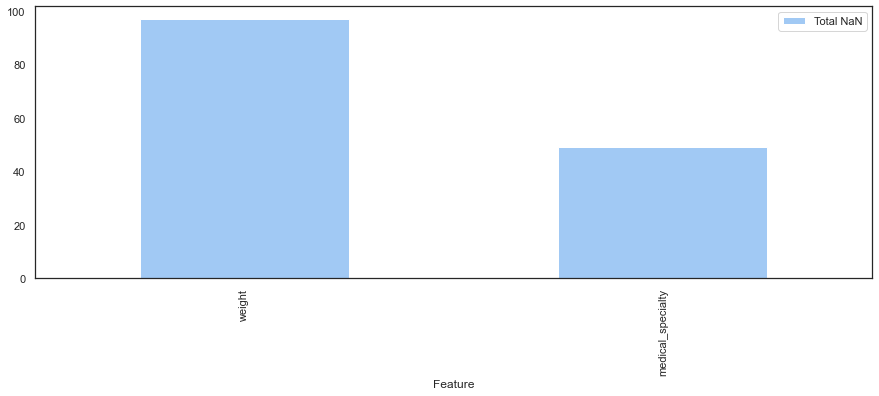

In [131]:
missing_thresold = 40
missings = helpers.missing_data(df, missing_thresold);
helpers.drop_missings(df, missings, missing_thresold)

In [132]:
df.drop(["encounter_id", "patient_nbr", "examide", "citoglipton"], axis=1, inplace=True)

## 3.4 Outliers treatment

In [133]:
def removing_outliers(df, columns):
    """
    Remove outliers of columns
    INPUT: df - DataFrame to Process
           col - Col to process
    OUTPUT:
            df proceseed
    """
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_without_outliers = df[~((df[columns] < (Q1 - 1.5 * IQR)) |
                               (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_without_outliers

num_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']
#df = removing_outliers(df, num_cols)

Log normalization

In [134]:
for col in num_cols:
    df[col] = np.log(df[col])

## 3.5 Dealing With NaNs <a class="anchor" id="DealingZeros"></a>

In [135]:
print("Percentage of data if drop all NaN {0:.2f}%".format(
    100 - len(df.dropna()) / len(df) * 100))

Percentage of data if drop all NaN 41.90%


In [136]:
df.isnull().sum()

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone  

In [137]:
#Inputing NaN value with a NaN numerical code as models uses numbers for both numerical and categorical features
df.fillna('-100', inplace = True, downcast=True) 

In [138]:
print("Percentage of data if drop all NaN {0:.2f}%".format(
    100 - len(df.dropna()) / len(df) * 100))

Percentage of data if drop all NaN 0.00%


## 3.6 Saving data transformed

In [139]:
df_dtypes = df.dtypes.to_frame('dtypes')
df_dtypes = df_dtypes.astype(str)
df.to_parquet(BASE_PATH + 'data/transformed/df_transformed.parquet.gzip', compression='gzip') 
df_dtypes.to_parquet(BASE_PATH + 'data/transformed/df_transformed_dtypes.parquet.gzip', compression='gzip') 

# 4. Features Engineering

## 4.1 New features

I will focus on features: medical specialty and diag_n as both has a high number of categories. However, due to high level of NaN of medical specialty it was removed. So I will focus to diag_n

I will start with a simple approach, just combine the diags and pickups the more relevants. Also I could group by them by category but for time restriction I go ahead for a faster approach

### Loading data transformed

In [140]:
df=pd.read_parquet(BASE_PATH + 'data/transformed/df_transformed.parquet.gzip')
dtypes=pd.read_parquet(BASE_PATH + 'data/transformed/df_transformed_dtypes.parquet.gzip')
df = df.astype(dtypes.to_dict()['dtypes'])

### Diag feature treatment

In [141]:
diag_conbine = (df['diag_1'].value_counts() + df['diag_1'].value_counts() + df['diag_1'].value_counts()).sort_values(ascending=False)/len(df)
diag_conbine.head(40).to_frame('% code vs diags')

,% code vs diags
428,0.202288
414,0.194004
786,0.118389
410,0.106539
486,0.103414
427,0.081540
491,0.067066
715,0.063410
682,0.060197
434,0.059784


Below top 40 the code diag start to apper just below 1% of total counts. So it appers to be a good threasold. It is huge better than near 800 categories that it has before

In [142]:
thresold_top_diags = 40
codes = diag_conbine.head(thresold_top_diags).to_frame('% code vs diags').index.to_list()
for code in codes:
    df['diag_'+ str(code)] = (df['diag_1'] == code)|(df['diag_2'] == code)|(df['diag_3'] == code)

## 4.2 Recoding

In [143]:
diag_list = ['diag_1','diag_2','diag_3']

    
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

for col in diag_list:
    df[col] = df[col].apply(transformFunc)
    df[col] = df[col].astype(float)
    
for col in diag_list:
    df[col] = df[col].apply(transformCategory)

In [144]:
#df.drop(["diag_1", "diag_2", "diag_3"], axis=1, inplace=True)
#Inputing NaN value with a NaN numerical code as models uses numbers for both numerical and categorical features
df.fillna('-100', inplace = True, downcast=True) 

## 4.3 Dummies creation

In [145]:
df = pd.get_dummies(df, columns=df.select_dtypes(include = ['object']).columns)
df.filter(regex='discharge_').sample(10)

,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,...,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28
47932,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27100,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54318,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37628,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7446,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54543,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31437,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84945,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29980,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73677,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4..4 Target creation

In [146]:
df["target"] = df['readmitted_<30']

In [147]:
df.drop(['readmitted_<30','readmitted_>30', 'readmitted_NO'], axis=1, inplace=True)

% of readmitted

Text(0.5, 1.0, 'Distribution of Readmission')

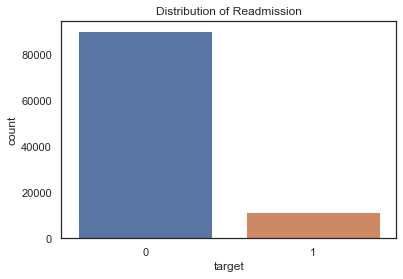

In [148]:
sns.countplot(df['target']).set_title('Distribution of Readmission')

## 4.5 Clean new features col name

In [149]:

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]


## 4.6 Saving feature engineered data

In [150]:
df_dtypes = df.dtypes.to_frame('dtypes')
df_dtypes = df_dtypes.astype(str)
df.to_parquet(BASE_PATH + 'data/feature-engineered/df_feature-engineered.parquet.gzip', compression='gzip') 
df_dtypes.to_parquet(BASE_PATH + 'data/feature-engineered/df_feature-engineered_dtypes.parquet.gzip', compression='gzip') 

# 5. Stage Four - Modelling <a class="anchor" id="Modelling"></a>


### Loading feature engineered data

In [151]:
df=pd.read_parquet(BASE_PATH + 'data/feature-engineered/df_feature-engineered.parquet.gzip')
dtypes=pd.read_parquet(BASE_PATH + 'data/feature-engineered/df_feature-engineered_dtypes.parquet.gzip')
df = df.astype(dtypes.to_dict()['dtypes'])

## 5.1. Build Model <a class="anchor" id="BuildModel"></a>


In [152]:
from sklearn.metrics import fbeta_score, roc_auc_score
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# For naive it not worst the money split train test as it is not a model
y_naive = len(df)*[1]
roc_auc = roc_auc_score(df['target'], y_naive)
fscore = fbeta_score(df['target'], y_naive, beta = 0.5)
print("Naive Predictor: [Roc_auc score: {:.4f}, F-score: {:.4f}]".format(roc_auc, fscore))

Naive Predictor: [Roc_auc score: 0.5000, F-score: 0.1357]


In [153]:
# Import train_test_split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=20)
X=df.loc[:, df.columns != 'target']
y=df['target'].to_numpy()


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 0)
X_train, y_train = smt.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train, columns = list(X.columns))

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 144592 samples.
Testing set has 20354 samples.


In [154]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test, train_sample = 10000): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
       
           '''
    
    results = {}
    
    #Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first n training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:train_sample])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute roc_auc_score on the first train_sample training samples which is y_train[:train_sample]
    results['roc_auc_train'] = roc_auc_score(y_train[:train_sample], predictions_train)
        
    # Compute roc_auc_score on test set using accuracy_score()
    results['roc_auc_test'] = roc_auc_score(y_test, predictions_test)
    
    # Compute F-score on the the first train_sample training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:train_sample], predictions_train, beta = 0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [155]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
clf_A = LogisticRegression(random_state=1)
clf_B = XGBClassifier(random_state=1)
clf_C = AdaBoostClassifier(random_state=1)

samples_100 = len(X_train)
samples_10 = int(0.1 * samples_100)
samples_1 = int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)



LogisticRegression trained on 1445 samples.
LogisticRegression trained on 14459 samples.
LogisticRegression trained on 144592 samples.
[06:37:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier trained on 1445 samples.
[06:37:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier trained on 14459 samples.
[06:37:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier trained on 14459

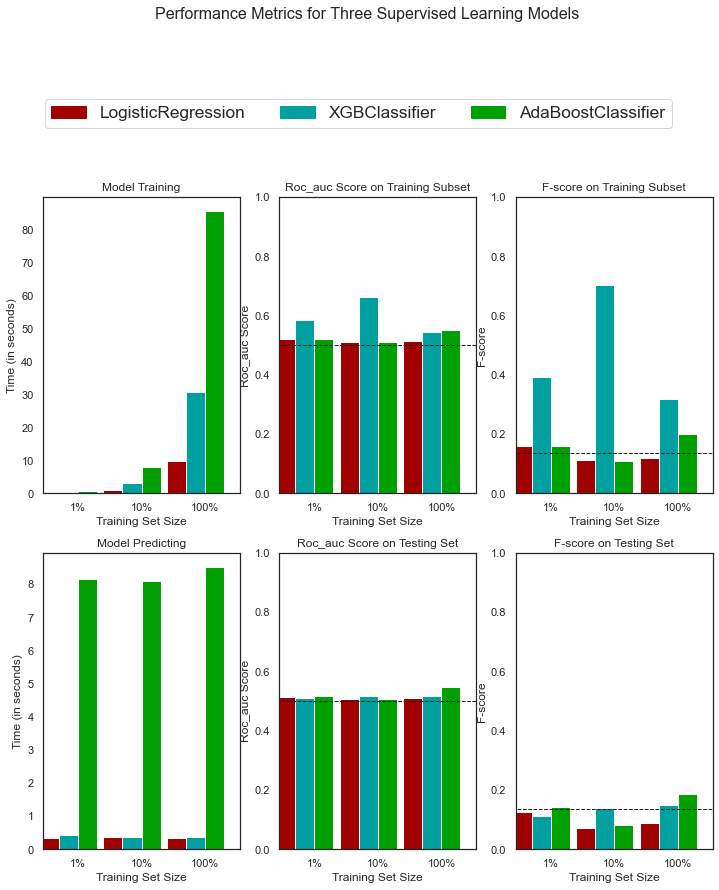

In [156]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, roc_auc, fscore, size = (12, 12))

XGBclassifiers has the best result in term of performance and f-score

## 5.2 Model tuning

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
"""param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.5]
}"""

param_grid = {
    'n_estimators': [300],
    'learning_rate' : [0.5]
}

ada_grid = GridSearchCV(AdaBoostClassifier(), param_grid = param_grid)
ada_grid.fit(X_train, y_train)
y_pred = ada_grid.predict(X_test)

In [159]:
roc_auc = roc_auc_score(y_test, y_pred)
fscore = fbeta_score(y_test, y_pred, beta = 0.5)
print("AdaBoost Predictor: [Roc_auc score: {:.4f}, F-score: {:.4f}]".format(roc_auc, fscore))

AdaBoost Predictor: [Roc_auc score: 0.5237, F-score: 0.1778]


## 5.3 Save Model

In [162]:
import joblib
joblib.dump(ada_grid.best_estimator_,BASE_PATH + 'serialized-model/diabetes_model_V' + str(VERSION) + '.pkl')

['/home/wiflore/Documents/personal_projects/Diabetes-ML-Case/serialized-model/diabetes_model_V2.pkl']

## 5.4 Model Insights

In [200]:
model = joblib.load(BASE_PATH + 'serialized-model/diabetes_model_V' + str(VERSION) + '.pkl')
df=pd.read_parquet(BASE_PATH + 'data/feature-engineered/df_feature-engineered.parquet.gzip')
dtypes=pd.read_parquet(BASE_PATH + 'data/feature-engineered/df_feature-engineered_dtypes.parquet.gzip')
df = df.astype(dtypes.to_dict()['dtypes'])

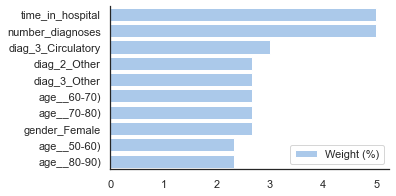

In [201]:
importances = model.feature_importances_
helpers.feature_plot(importances, X_train, y_train, n=10)

#### Time in hospital vs readmissions

<AxesSubplot:xlabel='time_in_hospital'>

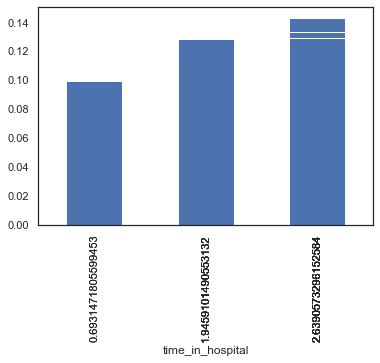

In [202]:
df.groupby(['time_in_hospital'])['target'].mean().plot.bar()

#### Number of diagnoses vs readmissions

<AxesSubplot:xlabel='number_diagnoses'>

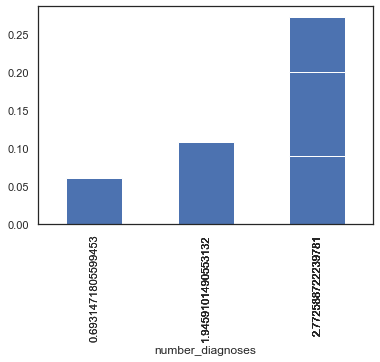

In [207]:
df.groupby(['number_diagnoses'])['target'].mean().plot.bar()

#### Diag Circulatory vs readmissions

<AxesSubplot:xlabel='diag_3_Circulatory'>

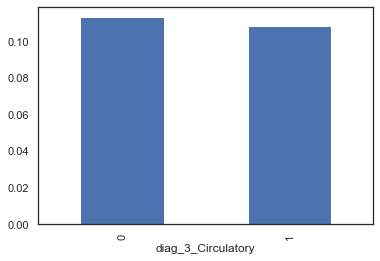

In [212]:
df.groupby(['diag_3_Circulatory'])['target'].mean().plot.bar()

## 5.5 PCA Insights

[0.15649184 0.25175267 0.32632954 0.37844189 0.42321627 0.46148891
 0.49147351 0.51861753 0.54462747 0.56816017 0.58771468 0.60644115
 0.62180806 0.63633968 0.6501888  0.66350837 0.67557142 0.6874551
 0.69845889 0.70928307 0.71961764 0.72951059 0.73873687 0.74758307
 0.75629289 0.76460804 0.77270836 0.78044143 0.78744917 0.79434345
 0.80100024 0.80762094 0.81395313 0.81995989 0.82590681 0.83177362
 0.83738497 0.84292127 0.84797201 0.85282522 0.85758896 0.86209915
 0.86652986 0.87087408 0.8750616  0.8791883  0.883163   0.88671707
 0.88995866 0.89305926 0.89606179 0.89895306 0.9016141  0.90423264
 0.90679465 0.90927805 0.91168795 0.91404708 0.9163596  0.91862442
 0.92084654 0.92304045 0.925211   0.92734912 0.92944702 0.93148673
 0.93345945 0.93542049 0.93728699 0.93914935 0.9409464  0.94267273
 0.94432984 0.94582349 0.9472976  0.9487373  0.95015123 0.95152839
 0.95288182 0.9542186  0.95551054 0.9567611  0.95799451 0.95921966
 0.96041083 0.96153043 0.96264818 0.96370454 0.96473573 0.96574

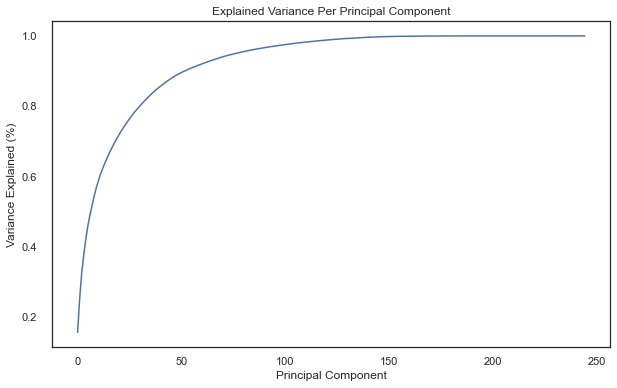

In [203]:
from sklearn.decomposition import PCA
threshold = 3
pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)


helpers.scree_plot(pca)

<Figure size 432x288 with 0 Axes>

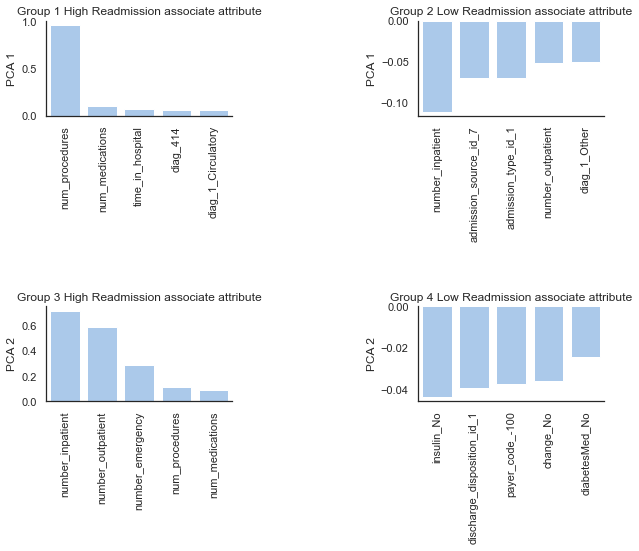

In [258]:
rows = 2
cols = 2
n = 5
pca_comp = helpers.get_components(pca.components_, df.columns, 5)
sns.set(style="white")
sns.set_color_codes("pastel")
sns.despine()
plt.figure(figsize=(10, 7));
plt.subplot(rows, cols, 1)
df_pca = pd.DataFrame(
    pca_comp["PCA 1"].sort_values(ascending=False).head(n))
plt.subplot(rows, cols, 1)
column = df_pca.columns
plt.title("Group 1 High Readmission associate attribute")
sns.barplot(data=df_pca, x=df_pca.index.values, y="PCA 1", color='b')
sns.despine()
plt.xticks(rotation=90)

df_pca = pd.DataFrame(pca_comp["PCA 1"].sort_values(ascending=True).head(n))
plt.subplot(rows, cols, 2)
column = df_pca.columns
plt.title("Group 2 Low Readmission associate attribute")
sns.barplot(data=df_pca, x=df_pca.index.values, y="PCA 1", color='b')
sns.despine()
plt.xticks(rotation=90)

df_pca = pd.DataFrame(
    pca_comp["PCA 2"].sort_values(ascending=False).head(n))
plt.subplot(rows, cols, 3)
column = df_pca.columns
plt.title("Group 3 High Readmission associate attribute")
sns.barplot(data=df_pca, x=df_pca.index.values, y="PCA 2", color='b')
sns.despine()
plt.xticks(rotation=90)

df_pca = pd.DataFrame(pca_comp["PCA 2"].sort_values(ascending=True).head(n))
plt.subplot(rows, cols, 4)
column = df_pca.columns
plt.title("Group 4 Low Readmission associate attribute")
sns.barplot(data=df_pca, x=df_pca.index.values, y="PCA 2", color='b')
sns.despine()
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=2)
plt.subplots_adjust(wspace=1)
plt.show();

## 6. Evaluation 
tbd

## 7. Deployment
tbd